# Correlação de ativos

Este projeto tem o intuito de avaliar as correlações de diferentes ativos em uma data específica

## Importar bibliotecas

In [15]:
import pandas_datareader as pdr
import yfinance as yf
import investpy
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

## Baixar os dados

In [8]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'VALE3.SA', 'BPAC11.SA']

In [17]:
inicio = '2019-01-01'

In [68]:
precos_acoes = pd.DataFrame()

for acao in acoes:
    precos_acoes[acao] = pdr.data.get_data_yahoo(acao, start=inicio)['Adj Close']

In [70]:
precos_acoes.head()

,PETR4.SA,WEGE3.SA,MGLU3.SA,VALE3.SA,BPAC11.SA
Date,,,,,
2019-01-02,21.260366,8.693207,5.641579,44.829338,5.837516
2019-01-03,21.781713,8.891438,5.581216,42.995453,6.078988
2019-01-04,21.843567,8.992972,5.411354,45.794544,6.294671
2019-01-07,22.188189,8.852759,5.495374,45.548859,6.423611
2019-01-08,22.055641,8.780235,5.451088,45.987583,6.303992


## Importando dados de FIIs, ETFs e BDRs

In [19]:
petr = yf.download('PETR4.SA', start = inicio)

[*********************100%***********************]  1 of 1 completed


In [20]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,22.549999,24.200001,22.280001,24.059999,21.260366,104534800
2019-01-03,23.959999,24.820000,23.799999,24.650000,21.781713,95206400
2019-01-04,24.850000,24.940001,24.469999,24.719999,21.843567,72119800
2019-01-07,24.850000,25.920000,24.700001,25.110001,22.188189,121711900
2019-01-08,25.400000,25.420000,24.770000,24.959999,22.055641,68761800


In [26]:
ativos = ['KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 'HGLG11.SA', 'HGBS11.SA', 'IVVB11.SA', 'AAPL34.SA']

In [27]:
precos_ativos = pd.DataFrame()

for ativo in ativos:
    precos_ativos[ativo] = yf.download(ativo, start = inicio)['Adj Close']
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Importando dados de índices, commodities e criptomoedas

#### Índices

In [44]:
search_results = investpy.search_quotes(text = 'bvsp', products = ['indices'], countries = ['brazil'], n_results = 10)

In [45]:
for search_result in search_results[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [48]:
ibov = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='04/09/2021')
ibov.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2019-01-02,87887.0,91479.0,87536.0,91012.0,5789071,3.56
2019-01-03,91011.0,91596.0,89922.0,91564.0,6253818,0.61
2019-01-04,91577.0,92701.0,90824.0,91841.0,5486725,0.30
2019-01-07,91845.0,92552.0,91288.0,91699.0,4706174,-0.15
2019-01-08,91699.0,92231.0,91064.0,92032.0,4635617,0.36


In [78]:
ibov = pd.DataFrame(ibov.Close).rename(columns = {'Close': 'IBOV'})

In [35]:
ibov.head()

,IBOV
Date,
2019-01-02,91012.0
2019-01-03,91564.0
2019-01-04,91841.0
2019-01-07,91699.0
2019-01-08,92032.0


#### Commodities

In [39]:
search_results_c = investpy.search_quotes(text = 'coffee', products = ['commodities'], countries = ['brazil'], n_results = 10)

for search_result_c in search_results_c[:5]:
    print(search_result_c)

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": null, "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [51]:
cafe = search_result_c.retrieve_historical_data(from_date='01/01/2019', to_date='04/09/2021')

In [52]:
cafe.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2019-01-02,122.25,124.80,121.60,121.45,184,-0.57
2019-01-03,121.25,125.45,121.25,124.95,265,2.88
2019-01-04,124.00,125.40,122.35,124.20,372,-0.60
2019-01-07,123.50,125.00,123.50,124.35,245,0.12
2019-01-08,125.00,128.75,125.00,127.40,329,2.45


In [53]:
cafe = pd.DataFrame(cafe.Close).rename(columns = {'Close': 'Cafe'})

#### Criptomoedas

In [54]:
bitcoin = investpy.get_crypto_historical_data(crypto = 'bitcoin', from_date='01/01/2019', to_date='04/09/2021')
bitcoin = pd.DataFrame(bitcoin.Close).rename(columns = {'Close': 'Bitcoin'})

In [57]:
bitcoin.head()

,Bitcoin
Date,
2019-01-01,3809.4
2019-01-02,3873.8
2019-01-03,3780.1
2019-01-04,3802.7
2019-01-05,3785.4


In [58]:
ethereum = investpy.get_crypto_historical_data(crypto = 'ethereum', from_date='01/01/2019', to_date='04/09/2021')
ethereum = pd.DataFrame(ethereum.Close).rename(columns = {'Close': 'Ethereum'})

In [59]:
ethereum.head()

,Ethereum
Date,
2019-01-01,139.61
2019-01-02,152.95
2019-01-03,146.94
2019-01-04,152.86
2019-01-05,153.49


## Dados do dólar

In [61]:
dolar = yf.download('USDBRL=X', start=inicio)

[*********************100%***********************]  1 of 1 completed


In [62]:
dolar.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3.8800,3.8800,3.8799,3.8800,3.8800,0
2019-01-02,3.8799,3.8959,3.8043,3.8799,3.8799,0
2019-01-03,3.7866,3.8047,3.7377,3.7863,3.7863,0
2019-01-04,3.7550,3.7836,3.7115,3.7551,3.7551,0
2019-01-07,3.7137,3.7229,3.6906,3.6612,3.6612,0


In [63]:
dolar = pd.DataFrame(dolar.Close).rename(columns = {'Close': 'Dolar'})

In [65]:
dolar.head()

,Dolar
Date,
2019-01-01,3.8800
2019-01-02,3.8799
2019-01-03,3.7863
2019-01-04,3.7551
2019-01-07,3.6612


## Juntando em apenas um DataFrame

In [82]:
dfs = [precos_acoes, precos_ativos, ibov, cafe, bitcoin, ethereum, dolar]

In [83]:
df_final = reduce(lambda left,right: pd.merge(left, right, on= 'Date'), dfs)

In [84]:
df_final.head()

,PETR4.SA,WEGE3.SA,MGLU3.SA,VALE3.SA,BPAC11.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,HGLG11.SA,HGBS11.SA,IVVB11.SA,AAPL34.SA,IBOV,Cafe,Bitcoin,Ethereum,Dolar
Date,,,,,,,,,,,,,,,,,
2019-01-02,21.260366,8.693207,5.641579,44.829338,5.837516,148.669998,149.000000,NaN,140.899994,237.399994,74.25,14.678836,91012.0,121.45,3873.8,152.95,3.8799
2019-01-03,21.781713,8.891438,5.581216,42.995453,6.078988,150.279999,149.000000,NaN,140.949997,237.699997,NaN,13.072694,91564.0,124.95,3780.1,146.94,3.7863
2019-01-04,21.843567,8.992972,5.411354,45.794544,6.294671,150.399994,148.820007,NaN,140.250000,237.479996,NaN,13.281661,91841.0,124.20,3802.7,152.86,3.7551
2019-01-07,22.188189,8.852759,5.495374,45.548859,6.423611,149.470001,144.000000,NaN,141.500000,238.500000,NaN,13.254933,91699.0,124.35,3985.9,149.96,3.6612
2019-01-08,22.055641,8.780235,5.451088,45.987583,6.303992,149.690002,140.009995,NaN,142.000000,240.000000,NaN,13.653433,92032.0,127.40,3971.0,148.41,3.7341


## Matriz de correlação

<AxesSubplot:>

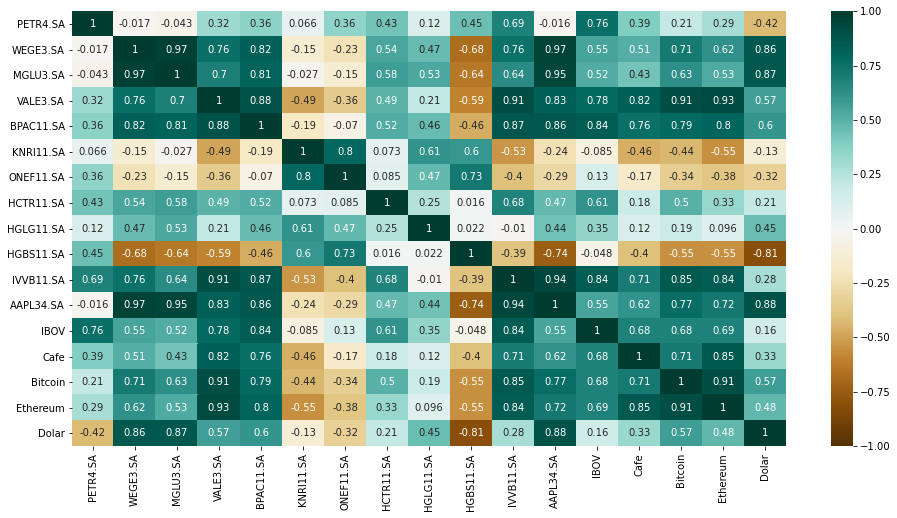

In [88]:
plt.figure(figsize = (16,8))
sns.heatmap(df_final.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')